In [2]:
import subprocess

def get_unique_count(file_path):
    """Run awk, sort, and wc commands to get the unique count of the 4th column."""
    command = f"awk '{{print $4}}' {file_path} | sort -u | wc -l"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    return int(result.stdout.strip())

def calculate_percentage(unique_count, total_count):
    """Calculate the percentage."""
    return (unique_count * 100) / total_count #if you do // it will be an interger division meaning it will round up automatically the result

def process_and_print_results(prefix, files, totals):
    """Process files, calculate percentages, and print results."""
    for file, total, organism in zip(files, totals, ["hg", "dm", "mm", "tair"]):
        unique_count = get_unique_count(file)
        percentage = calculate_percentage(unique_count, total)
        print(f"{prefix} {organism} ovlp g-quadruplex (no strand): {percentage} %")

# File paths and total counts
ee_files = [
    "/home/mouren/Data/g_quadruplex/overlap/ee_hg38_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/ee_dm6_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/ee_mm39_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/ee_tair10_overlapping_no_strand"
]
ee_totals = [13481, 13688, 12244, 7138]

neg_files = [
    "/home/mouren/Data/g_quadruplex/overlap/neg_hg38_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/neg_dm6_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/neg_mm39_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/neg_tair10_overlapping_no_strand"
]
neg_totals = [13253, 903, 18457, 7862]

pos_files = [
    "/home/mouren/Data/g_quadruplex/overlap/pos_hg38_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/pos_dm6_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/pos_mm39_overlapping_no_strand",
    "/home/mouren/Data/g_quadruplex/overlap/pos_tair10_overlapping_no_strand"
]
pos_totals = [404325, 133253, 149241, 9025]

# Process and print results for each category
process_and_print_results("EE", ee_files, ee_totals)
process_and_print_results("neg", neg_files, neg_totals)
process_and_print_results("pos", pos_files, pos_totals)


EE hg ovlp g-quadruplex (no strand): 37.47496476522513 %
EE dm ovlp g-quadruplex (no strand): 27.367036820572764 %
EE mm ovlp g-quadruplex (no strand): 37.61842535119242 %
EE tair ovlp g-quadruplex (no strand): 12.258335668254412 %
neg hg ovlp g-quadruplex (no strand): 8.669735154304686 %
neg dm ovlp g-quadruplex (no strand): 2.104097452934662 %
neg mm ovlp g-quadruplex (no strand): 7.926531939101696 %
neg tair ovlp g-quadruplex (no strand): 0.8776392775375222 %
pos hg ovlp g-quadruplex (no strand): 28.50701786928832 %
pos dm ovlp g-quadruplex (no strand): 44.79523913157678 %
pos mm ovlp g-quadruplex (no strand): 40.16657620895062 %
pos tair ovlp g-quadruplex (no strand): 4.753462603878116 %


In [5]:
#stats 
####### compute % of exons with data and stats 
from scipy.stats import fisher_exact, hypergeom
import numpy as np
#Table de contingence : nb de hit dataset A; nb de hit dataset B
#                          A-nb de hit A ;  B-nb  de hit B

#hsap
hsap_neg = np.array([[5052, 1149],
                  [13481-5052, 13253-1149]])

print(fisher_exact(hsap_neg,alternative="greater")) 
print ("% neg hsap", (1149*100)/13253)

#mm
mm_neg = np.array([[4606, 1463],
                  [12244-4606, 18457-1463]])

print(fisher_exact(mm_neg,alternative="greater")) 
print ("% neg mm", (1463*100)/18457)

#dmel
dmel_neg = np.array([[3746, 19],
                  [13688-3746, 903-19]])

print(fisher_exact(dmel_neg,alternative="greater")) 
print ("% neg dm", (19*100)/903)

#tair
t_neg = np.array([[875, 69],
                  [7138-875, 7862-69]])

print(fisher_exact(t_neg,alternative="greater")) 
print ("% neg tair", (69*100)/7862)


#hsap
hsap_pos = np.array([[5052, 115261],
                  [13481-5052, 404325-115261]])

print(fisher_exact(hsap_pos,alternative="greater")) 
print ("% pos hsap", (115261*100)/404325)

#mm
mm_pos = np.array([[4606, 59945],
                  [12244-4606, 149241-59945]])

print(fisher_exact(mm_pos,alternative="greater")) 
print ("% pos mm", (59945*100)/149241)

#dmel
dmel_pos = np.array([[3746, 59691],
                  [13688-3746, 133253-59691]])

print(fisher_exact(dmel_pos,alternative="greater")) 
print ("% pos dm", (59691*100)/133253)

#tair
t_pos = np.array([[875, 429],
                  [7138-875, 9025-429]])

print(fisher_exact(t_pos,alternative="greater")) 
print ("% pos tair", (429*100)/9025)

SignificanceResult(statistic=6.313877831321495, pvalue=0.0)
% neg hsap 8.669735154304686
SignificanceResult(statistic=7.004797217638827, pvalue=0.0)
% neg mm 7.926531939101696
SignificanceResult(statistic=17.530434414340014, pvalue=3.2737874404619005e-91)
% neg dm 2.104097452934662
SignificanceResult(statistic=15.779063605671219, pvalue=1.449171026117684e-207)
% neg tair 0.8776392775375222
SignificanceResult(statistic=1.5031382035616672, pvalue=3.77789155740759e-108)
% pos hsap 28.50701786928832
SignificanceResult(statistic=0.8983039724967403, pvalue=0.999999986548846)
% pos mm 40.16657620895062
SignificanceResult(statistic=0.4643427700805059, pvalue=1.0)
% pos dm 44.79523913157678
SignificanceResult(statistic=2.7993986959339026, pvalue=7.188914611329982e-68)
% pos tair 4.753462603878116


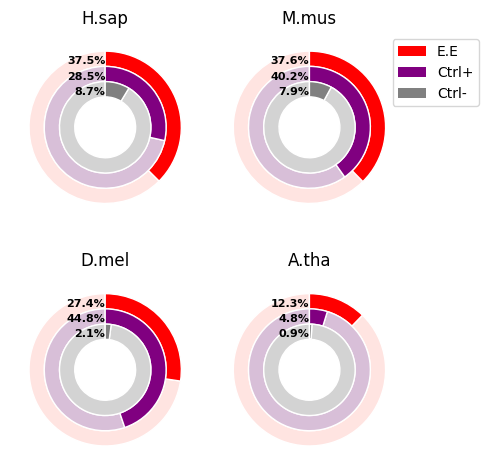

In [72]:
###donut 2x2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

# Data dictionaries
data_hg = {
    'E.E':[100-37.47496476522513,37.47496476522513],
    'Ctrl+':[100-28.50701786928832,28.50701786928832],
    'Ctrl-':[100-8.669735154304686,8.669735154304686],
}

data_mm = {
    'E.E':[100-37.61842535119242,37.61842535119242],
    'Ctrl+':[100-40.16657620895062,40.16657620895062],
    'Ctrl-':[100-7.926531939101696,7.926531939101696],

}

data_dm = {
    'E.E':[100-27.367036820572764,27.367036820572764],
    'Ctrl+':[100-44.79523913157678,44.79523913157678],
    'Ctrl-':[100-2.104097452934662,2.104097452934662],
}

data_tair = {
    'E.E':[100-12.258335668254412,12.258335668254412],
    'Ctrl+':[100-4.753462603878116,4.753462603878116],
    'Ctrl-':[100-0.8776392775375222,0.8776392775375222],

}

data_dicts = {'H.sap': data_hg, 'M.mus': data_mm, 'D.mel': data_dm,'A.tha':data_tair}

# Colors for layers
colors = {
    'E.E': ['mistyrose','red'],
    'Ctrl-': ['lightgray','gray'],
    'Ctrl+': ['thistle','purple'],
}

# Data labels for titles
data_labels = {'H.sap': "H.sap", 'M.mus': "M.mus", 'D.mel': "D.mel",'A.tha':'A.tha'}

# Create a figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

# Flatten the 2x2 grid for easier indexing
axes = axes.flatten()

# Plot data in the first three subplots
for i, (data_name, data) in enumerate(data_dicts.items()):
    ax = axes[i]
    for j, (layer, values) in enumerate(data.items()):
        ax.pie(
            values, 
            radius=1 - j * 0.2, 
            colors=colors[layer], 
            startangle=90, 
            wedgeprops=dict(width=0.2, edgecolor='w')
        )

    # Add the values to the right of the beginning of each circle
        angle = 90  # Start angle
        x = (1 - j * 0.2) * np.cos(np.radians(angle))
        y = (1 - j * 0.2) * np.sin(np.radians(angle))
        ax.text(
            x, y-0.13, 
            f"{values[1]:.1f}%", 
            ha='right', va='center', fontsize=8, color='black', weight='bold'
        )
        
    # Draw a circle at the center to make it a donut
    centre_circle = plt.Circle((0, 0), 0.2, fc='white')
    ax.add_artist(centre_circle)
    ax.set_aspect('equal')
    ax.set_title(data_labels[data_name], loc='center')

# Remove the remaining empty subplots
for k in range(len(data_dicts), len(axes)):
    axes[k].axis('off')

c1 = Patch(facecolor='red', label="E.E")
c2 = Patch(facecolor='gray', label="Ctrl-")
c3 = Patch(facecolor='purple', label="Ctrl+")
axes[1].legend(bbox_to_anchor=(0.9, 1),handles=[c1,c3,c2])

# Adjust layout and display the plot
plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/2.description_EE/g_quadruplex/all_species_gquadruplex_by_species_donut.pdf", format="pdf", bbox_inches="tight")

plt.show()
